In [71]:
# Sep 2020

# GPU GTX 1050TI
# tensorflow-gpu 2.8.0
# matplotlib 3.4.1
# sklearn 1.0.2
# numpy 1.22.3


from tensorflow.keras import Sequential
from keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

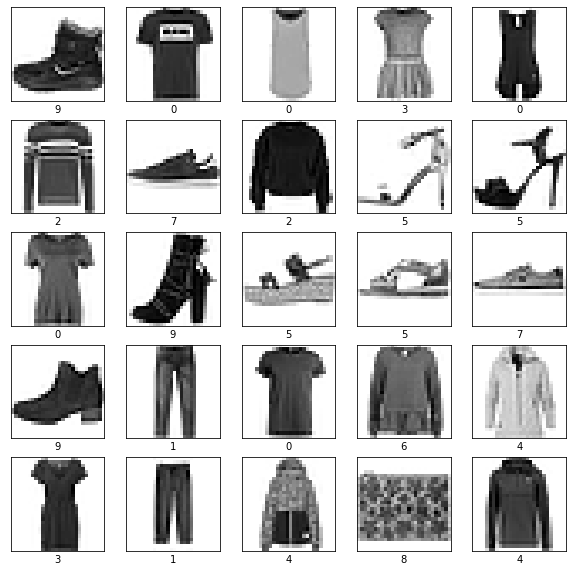

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    image = X_train[i].reshape((28, 28))
    plt.subplot(5, 5 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [10]:
X_train = X_train / 255
X_test = X_test / 255

num_pixels = X_train.shape[1] * X_train.shape[2]
x_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
x_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

print(x_train.shape)

(60000, 784)


In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [28]:
def baseline_model():
    model = Sequential([
                Flatten(input_shape=(num_pixels, 1)),
                Dense(128, activation='relu'),
                Dense(70, activation='relu'),
                Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
base_model = baseline_model()
base_history = base_model.fit(x_train,
                              y_train,
                              validation_data=(x_test,
                                               y_test),
                              epochs=10,
                              batch_size=200,
                              verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5635 - accuracy: 0.8043 - val_loss: 0.4642 - val_accuracy: 0.8352
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.8596 - val_loss: 0.4060 - val_accuracy: 0.8577
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8724 - val_loss: 0.3912 - val_accuracy: 0.8588
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8801 - val_loss: 0.3748 - val_accuracy: 0.8635
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 0.3096 - accuracy: 0.8874 - val_loss: 0.3661 - val_accuracy: 0.8698
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.8934 - val_loss: 0.3526 - val_accuracy: 0.8755
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.8960 - val_loss: 0.3484 - val_accuracy: 0.8786
Epoch 

In [31]:
_, train_acc = base_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = base_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.903, Test: 0.877


In [32]:
def history_vizualization(history):
    fig, ax = plt.subplots(2, 1, figsize=(15, 8))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    fig.tight_layout()
    plt.show()

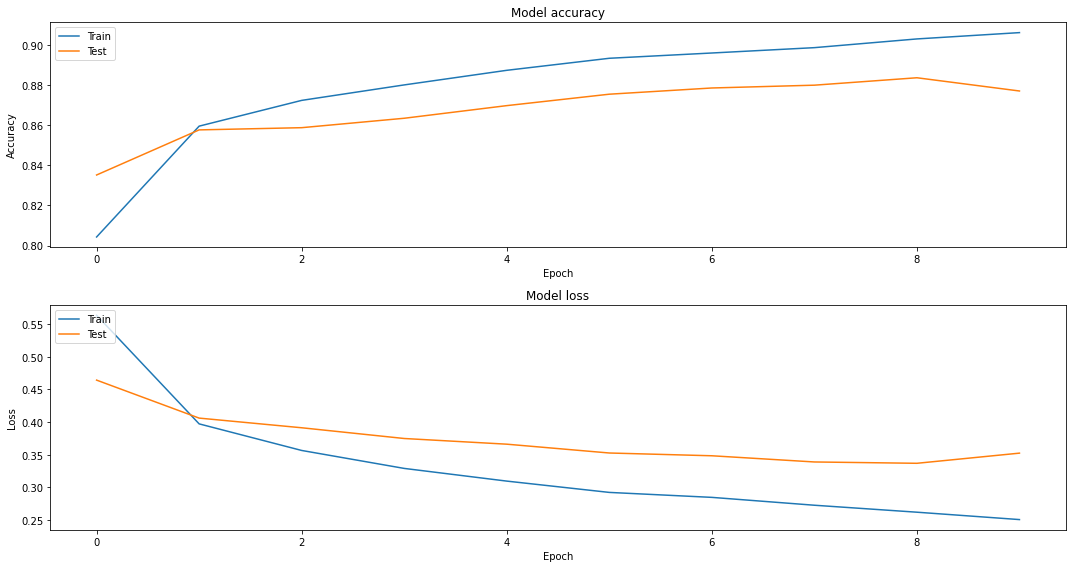

In [33]:
history_vizualization(base_history)

In [ ]:
####################################

In [53]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [54]:
X_train = X_train / 255
X_test = X_test / 255

x_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
x_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [55]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [56]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [57]:
def evaluate_model(x_data, y_data, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(x_data):
        x_train, y_train, x_test, y_test = x_data[train_ix], y_data[train_ix], x_data[test_ix], y_data[test_ix]
        model = cnn_model()
        history = model.fit(x_train,
                            y_train,
                            epochs=10,
                            batch_size=1000,
                            validation_data=(x_test,
                                             y_test),
                            verbose=0)
        
        _, acc = model.evaluate(x_test, y_test, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [58]:
scores, histories = evaluate_model(x_train, y_train)

> 87.767
> 88.117
> 87.717
> 88.117
> 88.450


In [72]:
def summarize_diagnostics(histories):
    fig = plt.figure(figsize=(10, 5))
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        
    fig.tight_layout()
    plt.show()

In [73]:
def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
    # box and whisker plots of results
    fig = plt.figure(figsize=(10, 5))
    plt.boxplot(scores)
    fig.tight_layout()
    plt.show()

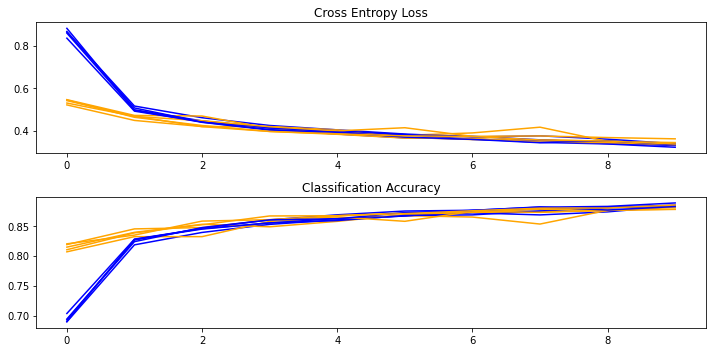

In [74]:
summarize_diagnostics(histories)

Accuracy: mean=88.033 std=0.268, n=5


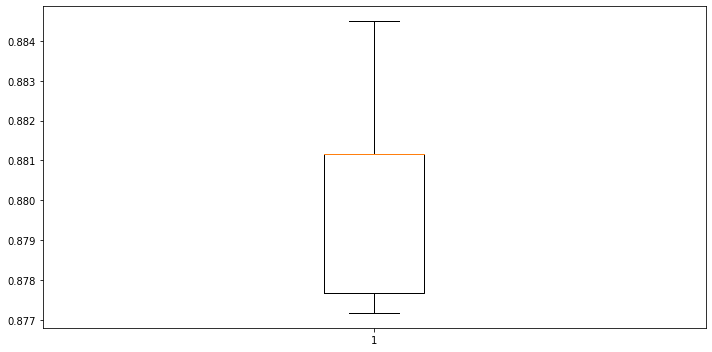

In [75]:
summarize_performance(scores)